In [1]:
#Notebook preferences
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn
import os


rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = False
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
                            recall_score, classification_report, make_scorer,  \
                            confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
                                GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 

In [42]:
df = pd.read_csv('../../Fraud/features.csv', index_col = 0)

In [43]:
df.head()

,purchase_value,age,class,risk_score,lagsecs,purchase_hour,freqdevice,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE
0,34,39,0,2,4506682.0,22,1,0,1,0,0,1,1,0,0
1,72,32,0,2,5959702.0,18,1,1,0,0,1,0,1,0,0
2,52,44,0,2,662649.0,12,1,1,0,0,1,0,1,0,0
3,22,36,0,2,3062448.0,9,1,0,1,1,0,0,1,0,0
4,32,37,0,2,6541411.0,22,2,0,1,0,0,1,0,1,0


In [44]:
#df_flash = df[df["lagsecs"]==1]
df = df[df["lagsecs"]!=1].drop(columns = ['lagsecs','source_Direct','source_SEO', 'source_Ads',
                                         'browser_Chrome', 'browser_FireFox', 'browser_IE'])
print(len(df))

143512


No handles with labels found to put in legend.


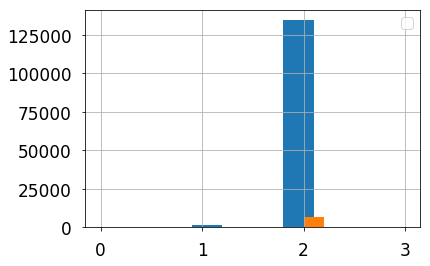

In [34]:
fig, ax = plt.subplots()
df.groupby('class')['risk_score'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


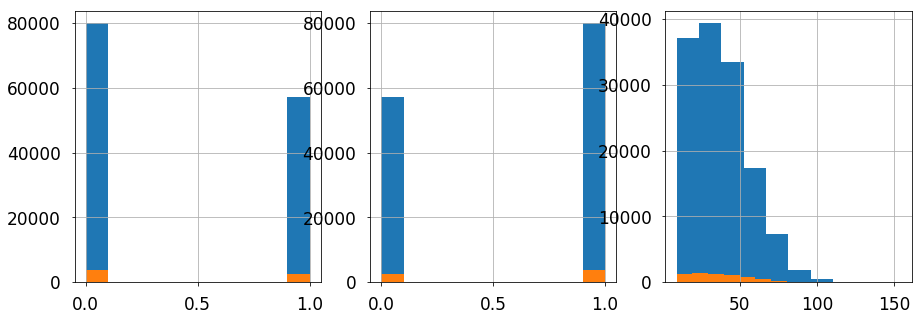

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,5))
df.groupby('class')['sex_F'].hist(ax=ax1)
df.groupby('class')['sex_M'].hist(ax=ax2)
df.groupby('class')['purchase_value'].hist(ax=ax3)
ax.legend();

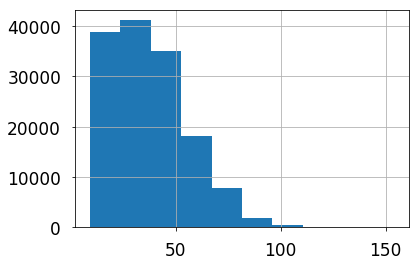

In [32]:
df['purchase_value'].hist()

In [45]:
X = df.drop(columns = ['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 43, test_size=0.2)

In [46]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27379
           1       0.14      0.12      0.13      1324

   micro avg       0.93      0.93      0.93     28703
   macro avg       0.55      0.54      0.54     28703
weighted avg       0.92      0.93      0.92     28703

[[26432   947]
 [ 1171   153]]


In [47]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test result
   print(classification_report(y_test, y_pred)) 
   test_results.append(roc_auc)
   print(confusion_matrix(y_test, y_pred))

/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]


/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]


/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27378     1]
 [ 1324     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27379
           1       0.13      0.10      0.11      1324

   micro avg       0.93      0.93      0.93     28703
   macro avg       0.54      0.53      0.54     28703
weighted avg       0.92      0.93      0.92     28703

[[26487   892]
 [ 1195   129]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27379
           1       0.13      0.10      0.12      1324

   micro avg       0.93      0.93      0.93     28703
   macro avg       0.55      0.54      0.54     28703
weighted avg       0.92      0.93      0.92     28703

[[26477   902]
 [ 1185   139]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27379
           1       0.13      0.11      0.12      1324

   micro avg       0.93      0.93      0.93     28703
   macro avg       0.55      0.54      0.54     28703
weighted avg

In [9]:
test_results

[0.5,
 0.5,
 0.5,
 0.49998173782826255,
 0.5002863326458444,
 0.5014010009877021,
 0.5013462144724897,
 0.5034659781257803,
 0.5045075977806882,
 0.5095148121661153,
 0.509155430833321,
 0.5134438825531598,
 0.5185117455557543,
 0.5174518637291089,
 0.5174277394554165,
 0.5224166916691062,
 0.5205591363879675,
 0.5234283249483666,
 0.5266875570830798,
 0.5262916514068107,
 0.5272426360689036,
 0.531177568557903,
 0.5303740330014547,
 0.5293206891426367,
 0.5329086403686244,
 0.53259885931496,
 0.5330195651307942,
 0.5349573829325825,
 0.5359083675946755,
 0.5370295739043608,
 0.5369696011530658,
 0.5371770230100054]

In [48]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27379
           1       0.10      0.04      0.05      1324

   micro avg       0.94      0.94      0.94     28703
   macro avg       0.53      0.51      0.51     28703
weighted avg       0.92      0.94      0.93     28703

[[26941   438]
 [ 1275    49]]


In [52]:
sm = SMOTE(random_state=12, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# Train a logistic regression model on the upsampled training data.
sm_rfc = RandomForestClassifier()
sm_rfc.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
len(y_train_res[y_train_res==1]),len(y_train_res[y_train_res==0])

(109582, 109582)

In [54]:
test_pred = sm_rfc.predict(X_test)
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     27379
           1       0.06      0.16      0.09      1324

   micro avg       0.85      0.85      0.85     28703
   macro avg       0.51      0.52      0.51     28703
weighted avg       0.92      0.85      0.88     28703

[[24248  3131]
 [ 1108   216]]


In [55]:
accuracy_score(y_test, test_pred)

0.8523150890150856

In [56]:
recall_score(y_test, test_pred)

0.16314199395770393

In [57]:
f1_score(y_test,test_pred)

0.09248554913294797

In [58]:
 precision_score(y_test,test_pred)

0.06453540484015537

In [59]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27378     1]
 [ 1324     0]]


In [71]:
sm = SMOTE(random_state=42, ratio = 0.5)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# Train a logistic regression model on the upsampled training data.
sm_gbc = AdaBoostClassifier()
sm_gbc.fit(x_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [72]:
test_pred = sm_gbc.predict(X_test)
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27379
           1       0.22      0.20      0.21      1324

   micro avg       0.93      0.93      0.93     28703
   macro avg       0.59      0.58      0.59     28703
weighted avg       0.93      0.93      0.93     28703

[[26421   958]
 [ 1060   264]]


In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gnb = GaussianNB()

In [75]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27379
           1       0.03      0.00      0.01      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.49      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27225   154]
 [ 1319     5]]


In [76]:
sm = SMOTE(random_state=42, ratio = 0.5)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# Train a logistic regression model on the upsampled training data.
sm_gnb = GaussianNB()
sm_gnb.fit(x_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
test_pred = sm_gnb.predict(X_test)
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]


/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
